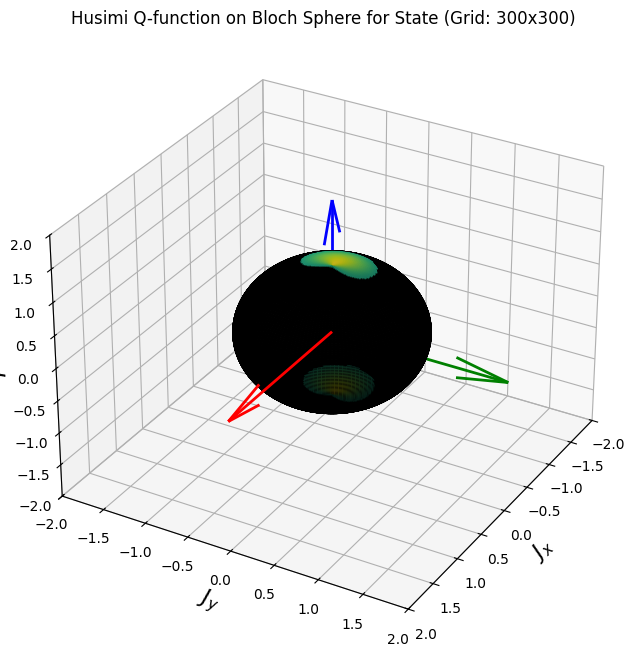

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from qutip import spin_coherent, Qobj

def plot_husimi_bloch(state, j, grid_size=300, threshold=0.6):
    """
    Function to plot the Husimi Q-function of a given state on the Bloch sphere.
    
    Parameters:
    - state: Coherent state to be evaluated and plotted.
    - j: Spin quantum number for the system.
    - grid_size: Resolution of the theta/phi grid on the Bloch sphere (default: 300x300).
    - threshold: Probability threshold for masking (default: 0.6).
    """
    
    # Generate grid for theta and phi on the Bloch sphere
    theta_sphere = np.linspace(0, np.pi, grid_size)
    phi_sphere = np.linspace(0, 2 * np.pi, grid_size)
    theta_mesh, phi_mesh = np.meshgrid(theta_sphere, phi_sphere)

    # Compute the Husimi Q-function for the given state
    Q_spin = np.array([[np.abs(state.overlap(spin_coherent(j, theta, phi)))**2 
                        for phi in phi_sphere] 
                       for theta in theta_sphere])

    # Normalize the Q-function
    Q_spin = Q_spin / np.max(Q_spin)

    # Mask values below a threshold to focus on higher probabilities
    Q_spin_masked = np.ma.masked_where(Q_spin < threshold, Q_spin)

    # Convert spherical coordinates to Cartesian for Bloch sphere mapping
    x = np.sin(theta_mesh) * np.cos(phi_mesh)
    y = np.sin(theta_mesh) * np.sin(phi_mesh)
    z = np.cos(theta_mesh)

    # Plot the Husimi Q-function on the Bloch sphere
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the white Bloch sphere
    ax.plot_surface(x, y, z, color='white', rstride=2, cstride=2, alpha=1, edgecolor='black')

    # Overlay the Husimi Q-function
    ax.plot_surface(x, y, z, facecolors=cm.viridis(Q_spin_masked), rstride=2, cstride=2, alpha=0.8)

    # Plot x, y, z axis arrows
    ax.quiver(0, 0, 0, 2, 0, 0, color='red', linewidths=2)  # x-axis
    ax.quiver(0, 0, 0, 0, 2, 0, color='green', linewidths=2)  # y-axis
    ax.quiver(0, 0, 0, 0, 0, 2, color='blue', linewidths=2)  # z-axis

    # Set labels and title
    ax.set_xlabel(r'$J_x$', fontsize=16)
    ax.set_ylabel(r'$J_y$', fontsize=16)
    ax.set_zlabel(r'$J_z$', fontsize=16)
    ax.set_title(f"Husimi Q-function on Bloch Sphere for State (Grid: {grid_size}x{grid_size})")

    # Adjust viewing angle for clarity
    ax.view_init(elev=30, azim=30)
    
    # Set axis limits
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 2])

    plt.show()

# Example usage
if __name__ == "__main__":
    j = 1  # Spin quantum number
    theta_ref = np.pi / 2  # Coherent state reference theta
    phi_ref = 0  # Coherent state reference phi

    # Generate a reference coherent state
    coherent_state = spin_coherent(j, theta_ref, phi_ref)

    # Call the function with the generated coherent state
    plot_husimi_bloch(coherent_state, j, grid_size=300, threshold=0.6)

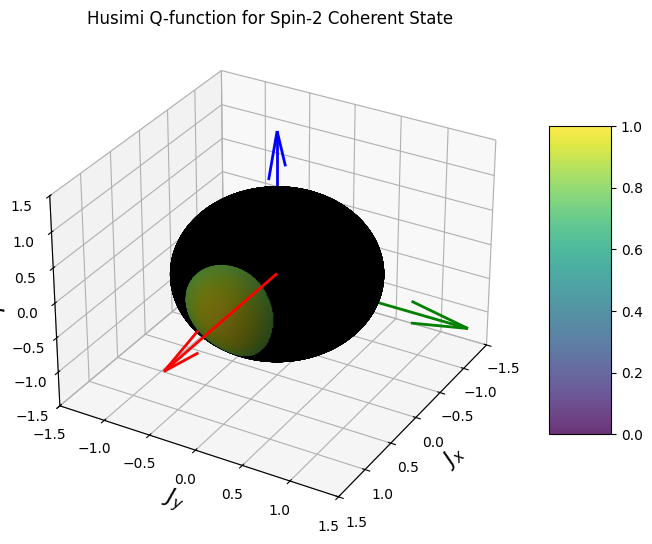

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from qutip import spin_coherent

def plot_husimi_bloch(j, theta_ref, phi_ref, grid_size=300, threshold=0.6):
    """
    Function to plot the Husimi Q-function of a spin coherent state on the Bloch sphere.
    
    Parameters:
    - j: Spin quantum number for the system.
    - theta_ref: Polar angle of the coherent state.
    - phi_ref: Azimuthal angle of the coherent state.
    - grid_size: Resolution of the theta/phi grid on the Bloch sphere (default: 300x300).
    - threshold: Probability threshold for masking (default: 0.6).
    """
    
    # Generate grid for theta and phi on the Bloch sphere
    theta_sphere = np.linspace(0, np.pi, grid_size)
    phi_sphere = np.linspace(0, 2 * np.pi, grid_size)
    theta_mesh, phi_mesh = np.meshgrid(theta_sphere, phi_sphere)
    
    # Calculate the Q-function directly
    cos_gamma = np.cos(theta_ref/2) * np.cos(theta_mesh/2) + \
                np.sin(theta_ref/2) * np.sin(theta_mesh/2) * np.cos(phi_ref - phi_mesh)
    Q_spin = (2*j + 1) / (4*np.pi) * np.power(np.abs(cos_gamma), 2*j)

    # Normalize the Q-function
    Q_spin = Q_spin / np.max(Q_spin)

    # Mask values below a threshold to focus on higher probabilities
    Q_spin_masked = np.ma.masked_where(Q_spin < threshold, Q_spin)

    # Convert spherical coordinates to Cartesian for Bloch sphere mapping
    x = np.sin(theta_mesh) * np.cos(phi_mesh)
    y = np.sin(theta_mesh) * np.sin(phi_mesh)
    z = np.cos(theta_mesh)

    # Plot the Husimi Q-function on the Bloch sphere
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the white Bloch sphere
    ax.plot_surface(x, y, z, color='white', rstride=2, cstride=2, alpha=1, edgecolor='black')

    # Overlay the Husimi Q-function
    surf = ax.plot_surface(x, y, z, facecolors=cm.viridis(Q_spin_masked), rstride=1, cstride=1, alpha=0.8)

    # Plot x, y, z axis arrows
    ax.quiver(0, 0, 0, 2, 0, 0, color='red', linewidth=2)  # x-axis
    ax.quiver(0, 0, 0, 0, 2, 0, color='green', linewidth=2)  # y-axis
    ax.quiver(0, 0, 0, 0, 0, 2, color='blue', linewidth=2)  # z-axis

    # Plot the direction of the coherent state
    u = np.sin(theta_ref) * np.cos(phi_ref)
    v = np.sin(theta_ref) * np.sin(phi_ref)
    w = np.cos(theta_ref)
    ax.quiver(0, 0, 0, u, v, w, color='black', linewidth=2)

    # Set labels and title
    ax.set_xlabel(r'$J_x$', fontsize=16)
    ax.set_ylabel(r'$J_y$', fontsize=16)
    ax.set_zlabel(r'$J_z$', fontsize=16)
    ax.set_title(f"Husimi Q-function for Spin-{j} Coherent State")

    # Add a color bar
    fig.colorbar(surf, shrink=0.5, aspect=5)

    # Adjust viewing angle for clarity
    ax.view_init(elev=30, azim=30)
    
    # Set axis limits
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])

    plt.show()

# Example usage
if __name__ == "__main__":
    j = 2  # Spin quantum number
    theta_ref = np.pi / 2  # Coherent state reference theta
    phi_ref = 0 # Coherent state reference phi

    # Call the function with the coherent state parameters
    plot_husimi_bloch(j, theta_ref, phi_ref, grid_size=600, threshold=0.8)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from qutip import spin_coherent

def plot_husimi_bloch(state, j, grid_size=300, threshold=0.6):
    """
    Function to plot the Husimi Q-function of a given quantum state on the Bloch sphere.
    
    Parameters:
    - state: Input quantum state to compare with test coherent states on the Bloch sphere.
    - j: Spin quantum number for the system.
    - grid_size: Resolution of the theta/phi grid on the Bloch sphere (default: 300x300).
    - threshold: Probability threshold for masking (default: 0.6).
    """
    
    # Generate grid for theta and phi on the Bloch sphere
    theta_sphere = np.linspace(0, np.pi, grid_size)
    phi_sphere = np.linspace(0, 2 * np.pi, grid_size)
    theta_mesh, phi_mesh = np.meshgrid(theta_sphere, phi_sphere)

    # Initialize the Q-function storage
    Q_spin = np.zeros_like(theta_mesh)

    # Calculate the Husimi Q-function by computing overlaps with test coherent states
    for i in range(len(theta_sphere)):
        for k in range(len(phi_sphere)):
            # Create a test coherent state at (theta_mesh[i, k], phi_mesh[i, k])
            test_state = spin_coherent(j, theta_mesh[i, k], phi_mesh[i, k])
            # Compute the overlap: <test_state|state>
            overlap = np.abs((test_state.dag() * state).full()[0, 0]) ** 2
            Q_spin[i, k] = overlap

    # Normalize the Q-function
    Q_spin = Q_spin / np.max(Q_spin)

    # Mask values below a threshold to focus on higher probabilities
    Q_spin_masked = np.ma.masked_where(Q_spin < threshold, Q_spin)

    # Convert spherical coordinates to Cartesian for Bloch sphere mapping
    x = np.sin(theta_mesh) * np.cos(phi_mesh)
    y = np.sin(theta_mesh) * np.sin(phi_mesh)
    z = np.cos(theta_mesh)

    # Plot the Husimi Q-function on the Bloch sphere
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the white Bloch sphere
    ax.plot_surface(x, y, z, color='white', rstride=2, cstride=2, alpha=1, edgecolor='black')

    # Overlay the Husimi Q-function
    surf = ax.plot_surface(x, y, z, facecolors=cm.viridis(Q_spin_masked), rstride=1, cstride=1, alpha=0.8)

    # Plot x, y, z axis arrows
    ax.quiver(0, 0, 0, 2, 0, 0, color='red', linewidth=2)  # x-axis
    ax.quiver(0, 0, 0, 0, 2, 0, color='green', linewidth=2)  # y-axis
    ax.quiver(0, 0, 0, 0, 0, 2, color='blue', linewidth=2)  # z-axis

    # Set labels and title
    ax.set_xlabel(r'$J_x$', fontsize=16)
    ax.set_ylabel(r'$J_y$', fontsize=16)
    ax.set_zlabel(r'$J_z$', fontsize=16)
    ax.set_title(f"Husimi Q-function for Spin-{j} Coherent State")

    # Add a color bar
    fig.colorbar(surf, shrink=0.5, aspect=5)

    # Adjust viewing angle for clarity
    ax.view_init(elev=30, azim=30)
    
    # Set axis limits
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])

    plt.show()

# Example usage
if __name__ == "__main__":
    j = 2  # Spin quantum number
    theta_ref = np.pi / 2  # Coherent state reference theta
    phi_ref = 0  # Coherent state reference phi

    # Create a coherent state as the input quantum state
    state = spin_coherent(j, theta_ref, phi_ref)

    # Call the function with the created state
    plot_husimi_bloch(state, j, grid_size=300, threshold=0.8)


AttributeError: 'complex' object has no attribute 'full'

In [42]:
import numpy as np

def ket_to_spherical(ket_vector):
    """
    Convert a qubit ket vector to Bloch sphere spherical coordinates (theta, phi).
    
    ket_vector: [a, b] where |ψ⟩ = a|0⟩ + b|1⟩
    """
    # Extract the amplitudes
    a = ket_vector[0]
    b = ket_vector[1]
    
    # Compute the polar angle θ
    theta = 2 * np.arccos(np.abs(a))
    
    # Compute the azimuthal angle φ
    phi = np.angle(b) - np.angle(a)
    
    # Ensure φ is in the range [0, 2π]
    phi = phi % (2 * np.pi)
    
    return theta, phi

# Example: |ψ⟩ = 1/√2 |0⟩ + i/√2 |1⟩
ket_vector = qutip.
theta, phi = ket_to_spherical(ket_vector)
print(f"Spherical coordinates: θ = {theta:.4f}, φ = {phi:.4f}")


Spherical coordinates: θ = 1.5708, φ = 1.5708


The highest overlap occurs at Cartesian coordinates (x, y, z):
x = 1.0000, y = 0.0000, z = 0.0031
The corresponding spherical coordinates (theta, phi):
theta = 1.5676, phi = 0.0000


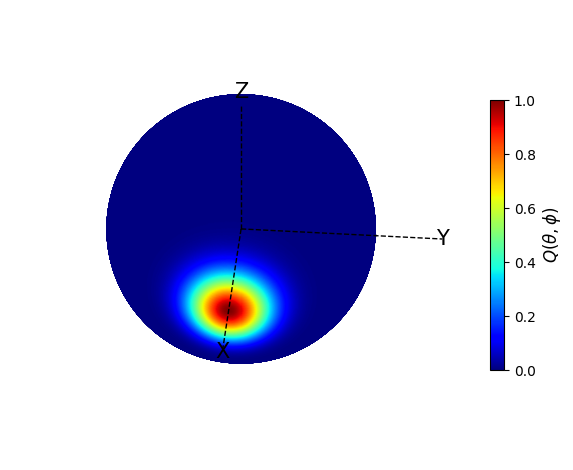

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters for the coherent state
theta0 = np.pi / 2  # Theta angle of the coherent state (mean direction)
phi0 = 0            # Phi angle of the coherent state

# Spin quantum number (increase to narrow down the colors)
J = 50  # Adjust this value for different spin systems (J = N/2)

# Create a grid of theta and phi values (increase resolution)
n_theta = 500
n_phi = 1000
theta = np.linspace(0, np.pi, n_theta)
phi = np.linspace(0, 2 * np.pi, n_phi)
theta_grid, phi_grid = np.meshgrid(theta, phi)

# Compute the overlap between spin coherent states
cos_theta_2 = np.cos(theta_grid / 2)
sin_theta_2 = np.sin(theta_grid / 2)
cos_theta0_2 = np.cos(theta0 / 2)
sin_theta0_2 = np.sin(theta0 / 2)

overlap = cos_theta_2 * cos_theta0_2 + sin_theta_2 * sin_theta0_2 * np.exp(-1j * (phi_grid - phi0))

# Husimi Q function
Q_vals = np.abs(overlap) ** (2 * J)

# Normalize the Q function
Q_vals /= np.max(Q_vals)

# Find the coordinates of the maximum overlap (highest Q value)
max_idx = np.unravel_index(np.argmax(Q_vals, axis=None), Q_vals.shape)
max_theta = theta_grid[max_idx]
max_phi = phi_grid[max_idx]

# Convert to Cartesian coordinates (x, y, z)
max_x = np.sin(max_theta) * np.cos(max_phi)
max_y = np.sin(max_theta) * np.sin(max_phi)
max_z = np.cos(max_theta)

# Print the coordinates of the highest overlap
print(f'The highest overlap occurs at Cartesian coordinates (x, y, z):')
print(f'x = {max_x:.4f}, y = {max_y:.4f}, z = {max_z:.4f}')
print(f'The corresponding spherical coordinates (theta, phi):')
print(f'theta = {max_theta:.4f}, phi = {max_phi:.4f}')

# Correct spherical to Cartesian coordinates for plotting
x = np.sin(theta_grid) * np.cos(phi_grid)
y = np.sin(theta_grid) * np.sin(phi_grid)
z = np.cos(theta_grid)

# Plotting the Bloch sphere and Husimi Q function

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the Bloch sphere as a semi-transparent surface
u, v = np.mgrid[0:2 * np.pi:100j, 0:np.pi:50j]
sphere_x = np.sin(v) * np.cos(u)
sphere_y = np.sin(v) * np.sin(u)
sphere_z = np.cos(v)
ax.plot_surface(sphere_x, sphere_y, sphere_z, color='gray', alpha=0.2, edgecolor='none')

# Normalize the Q values for the colormap
norm = plt.Normalize(Q_vals.min(), Q_vals.max())
colors = plt.cm.jet(norm(Q_vals))

# Plot the Husimi Q function on the sphere, mapping the colors
sphere = ax.plot_surface(x, y, z, facecolors=colors, rstride=1, cstride=1, alpha=0.8, shade=False)

# Plot the 3D axes centered on the Bloch sphere
ax.plot([-1, 1], [0, 0], [0, 0], color='black', lw=2)  # X-axis
ax.plot([0, 0], [-1, 1], [0, 0], color='black', lw=2)  # Y-axis
ax.plot([0, 0], [0, 0], [-1, 1], color='black', lw=2)  # Z-axis

# Plot the coherent state's position
ax.scatter(max_x, max_y, max_z, color='black', s=100, zorder=9)

# Set the colorbar, link it to the surface plot (sphere)
mappable = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=norm)
mappable.set_array(Q_vals)
cbar = plt.colorbar(mappable, ax=ax, shrink=0.6)
cbar.set_label(r'$Q(\theta, \phi)$', fontsize=12)

# X-axis: Line from (-1,0,0) to (1,0,0)
ax.plot([0, 1.5], [0, 0], [0, 0], color='black', lw=1, zorder=10, linestyle='--')
ax.text(1.5, 0, 0, 'X', color='black', fontsize=15, ha='center', va='center', zorder=10)

# Y-axis: Line from (0,-1,0) to (0,1,0)
ax.plot([0, 0], [0, 1.5], [0, 0], color='black', lw=1, zorder=10, linestyle='--')
ax.text(0, 1.5, 0, 'Y', color='black', fontsize=15, ha='center', va='center', zorder=10)

# Z-axis: Line from (0,0,-1) to (0,0,1)
ax.plot([0, 0], [0, 0], [0, 1.1], color='black', lw=1, zorder=10, linestyle='--')
ax.text(0, 0, 1.2, 'Z', color='black', fontsize=15, ha='center', va='center', zorder=10)

# Customize the plot
ax.set_xlabel('X-axis', fontsize=12)
ax.set_ylabel('Y-axis', fontsize=12)
ax.set_zlabel('Z-axis', fontsize=12)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_box_aspect([1,1,1])  # Equal aspect ratio

# Set the view angle to ensure the "hottest" region is visible
ax.view_init(elev=35, azim=5)  # Looking at the sphere from a different angle
ax.set_axis_off()
plt.tight_layout()

# Show the plot
plt.show()


The highest overlap occurs at Cartesian coordinates (x, y, z):
x = 1.0000, y = 0.0000, z = 0.0053
The corresponding spherical coordinates (theta, phi):
theta = 1.5655, phi = 0.0000


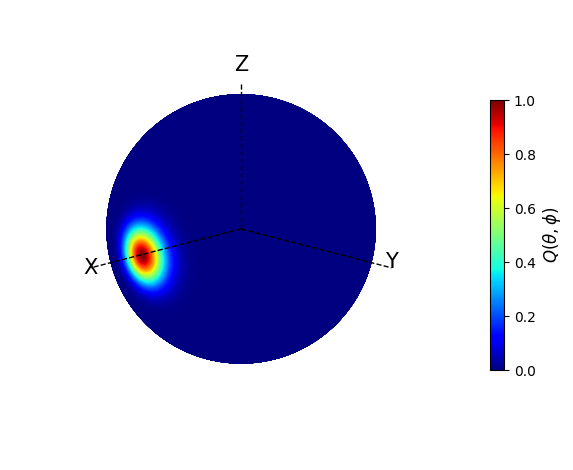

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from qutip import spin_coherent, Qobj

# Function to generate the coherent state
def generate_coherent_state(J, theta0, phi0):
    return spin_coherent(J, theta0, phi0)

# Function to compute the Husimi Q function over the theta and phi grid
def compute_husimi_q(J, coherent_state, n_theta=300, n_phi=600):
    theta = np.linspace(0, np.pi, n_theta)
    phi = np.linspace(0, 2 * np.pi, n_phi)
    theta_grid, phi_grid = np.meshgrid(theta, phi)

    Q_vals = np.zeros_like(theta_grid, dtype=np.float64)

    # Loop through the grid to compute the Husimi Q function
    for i in range(n_phi):  # Loop over n_phi for the correct axis (axis=1 in grid)
        for j in range(n_theta):  # Loop over n_theta for the correct axis (axis=0 in grid)
            test_state = spin_coherent(J, theta_grid[i, j], phi_grid[i, j])
            Q_vals[i, j] = np.abs(test_state.dag() * coherent_state)**2

    # Normalize the Q function
    Q_vals /= np.max(Q_vals)

    return Q_vals, theta_grid, phi_grid

# Function to find the maximum overlap
def find_max_overlap(Q_vals, theta_grid, phi_grid):
    max_idx = np.unravel_index(np.argmax(Q_vals, axis=None), Q_vals.shape)
    max_theta = theta_grid[max_idx]
    max_phi = phi_grid[max_idx]

    # Convert to Cartesian coordinates (x, y, z)
    max_x = np.sin(max_theta) * np.cos(max_phi)
    max_y = np.sin(max_theta) * np.sin(max_phi)
    max_z = np.cos(max_theta)

    return max_x, max_y, max_z, max_theta, max_phi

# Function to plot the Bloch sphere and the Husimi Q function
def plot_husimi_q(Q_vals, theta_grid, phi_grid, max_coords):
    x = np.sin(theta_grid) * np.cos(phi_grid)
    y = np.sin(theta_grid) * np.sin(phi_grid)
    z = np.cos(theta_grid)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the Bloch sphere as a semi-transparent surface
    u, v = np.mgrid[0:2 * np.pi:100j, 0:np.pi:50j]
    sphere_x = np.sin(v) * np.cos(u)
    sphere_y = np.sin(v) * np.sin(u)
    sphere_z = np.cos(v)
    ax.plot_surface(sphere_x, sphere_y, sphere_z, color='gray', alpha=0.2, edgecolor='none')

    # Normalize the Q values for the colormap
    norm = plt.Normalize(Q_vals.min(), Q_vals.max())
    colors = plt.cm.jet(norm(Q_vals))

    # Plot the Husimi Q function on the sphere, mapping the colors
    sphere = ax.plot_surface(x, y, z, facecolors=colors, rstride=1, cstride=1, alpha=0.8, shade=False)

    # Plot the 3D axes centered on the Bloch sphere
    ax.plot([-1, 1], [0, 0], [0, 0], color='black', lw=2)  # X-axis
    ax.plot([0, 0], [-1, 1], [0, 0], color='black', lw=2)  # Y-axis
    ax.plot([0, 0], [0, 0], [-1, 1], color='black', lw=2)  # Z-axis

    # Plot the coherent state's position
    max_x, max_y, max_z = max_coords
    ax.scatter(max_x, max_y, max_z, color='black', s=100, zorder=9)

    # Set the colorbar, link it to the surface plot (sphere)
    mappable = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=norm)
    mappable.set_array(Q_vals)
    cbar = plt.colorbar(mappable, ax=ax, shrink=0.6)
    cbar.set_label(r'$Q(\theta, \phi)$', fontsize=12)

    # X-axis: Line from (-1,0,0) to (1,0,0)
    ax.plot([0, 1.5], [0, 0], [0, 0], color='black', lw=1, zorder=10, linestyle='--')
    ax.text(1.5, 0, 0, 'X', color='black', fontsize=15, ha='center', va='center', zorder=10)

    # Y-axis: Line from (0,-1,0) to (0,1,0)
    ax.plot([0, 0], [0, 1.5], [0, 0], color='black', lw=1, zorder=10, linestyle='--')
    ax.text(0, 1.5, 0, 'Y', color='black', fontsize=15, ha='center', zorder=10)

    # Z-axis: Line from (0,0,-1) to (0,0,1)
    ax.plot([0, 0], [0, 0], [0, 1.1], color='black', lw=1, zorder=10, linestyle='--')
    ax.text(0, 0, 1.2, 'Z', color='black', fontsize=15, ha='center', zorder=10)

    # Customize the plot
    ax.set_xlabel('X-axis', fontsize=12)
    ax.set_ylabel('Y-axis', fontsize=12)
    ax.set_zlabel('Z-axis', fontsize=12)
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio

    # Set the view angle to ensure the "hottest" region is visible
    ax.view_init(elev=15, azim=45)  # Adjust the view if needed
    ax.set_axis_off()
    plt.tight_layout()

    # Show the plot
    plt.show()



In [48]:
# Main execution flow
# Parameters for the coherent state
theta0 = np.pi / 2  # Theta angle of the coherent state (mean direction)
phi0 = 0            # Phi angle of the coherent state
J = 50              # Spin quantum number

# Step 1: Generate the coherent state
coherent_state = generate_coherent_state(J, theta0, phi0)

# Step 2: Compute the Husimi Q function
Q_vals, theta_grid, phi_grid = compute_husimi_q(J, coherent_state)

# Step 3: Find the maximum overlap


The highest overlap occurs at Cartesian coordinates (x, y, z):
x = 1.0000, y = 0.0000, z = 0.0053
The corresponding spherical coordinates (theta, phi):
theta = 1.5655, phi = 0.0000


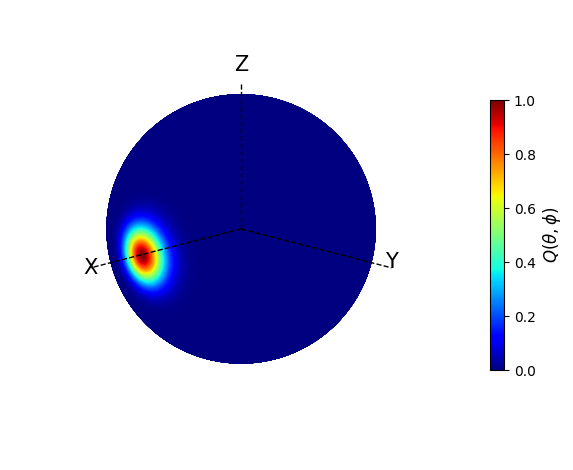

In [49]:
max_x, max_y, max_z, max_theta, max_phi = find_max_overlap(Q_vals, theta_grid, phi_grid)
print(f'The highest overlap occurs at Cartesian coordinates (x, y, z):')
print(f'x = {max_x:.4f}, y = {max_y:.4f}, z = {max_z:.4f}')
print(f'The corresponding spherical coordinates (theta, phi):')
print(f'theta = {max_theta:.4f}, phi = {max_phi:.4f}')

# Step 4: Plot the Husimi Q function and the Bloch sphere
plot_husimi_q(Q_vals, theta_grid, phi_grid, (max_x, max_y, max_z))


In [ ]:
https://github.com/echkon/tqix-developers/blob/f0537a75237770014795af07a659b1d73ef09bc5/tqix/quasi_prob.py#L19